## <font color=pink>피드백</font>

<font color=pink>
1. 제공해주신 코드는 회기역에 대해서만 돌아갑니다. 링크에 대한 코드를 제거하신 것 같습니다.<br>
2. Enter나 return을 사용하지 않고, 서울대입구역, 신촌역, 회기역의 링크 리스트를 만들어서 반복문을 통해 자동제어가 가능할 것 같습니다.<br>
3. 크롤링 하신 특징들에 대해서 칼럼명에 단위를 붙여주시면 더 좋을 것 같습니다.<br>
</font>

## 크롤링

* 서울대입구역, 신촌역, 회기역의 집값 데이터를 다방에서 크롤링하여 간단하게 EDA를 진행해보았습니다.

* 더 많은 지역을 하기 위해 자동화를 진행하였으나 왜인지 다방 검색창에서는 ENTER나 RETURN 등이 먹히질 않아서 자동화를 진행하지 못했습니다,,

* 코드가 중구난방입니다. 죄송합니다ㅠㅠ

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [6]:
driver = webdriver.Chrome('./chromedriver')

In [7]:
driver.get("https://www.dabangapp.com/search/map?filters=%7B%22multi_room_type%22%3A%5B0%2C1%2C2%5D%2C%22selling_type%22%3A%5B0%2C1%2C2%5D%2C%22deposit_range%22%3A%5B0%2C999999%5D%2C%22price_range%22%3A%5B0%2C999999%5D%2C%22trade_range%22%3A%5B0%2C999999%5D%2C%22maintenance_cost_range%22%3A%5B0%2C999999%5D%2C%22room_size%22%3A%5B0%2C999999%5D%2C%22supply_space_range%22%3A%5B0%2C999999%5D%2C%22room_floor_multi%22%3A%5B1%2C2%2C3%2C4%2C5%2C6%2C7%2C-1%2C0%5D%2C%22division%22%3Afalse%2C%22duplex%22%3Afalse%2C%22room_type%22%3A%5B1%2C2%5D%2C%22use_approval_date_range%22%3A%5B0%2C999999%5D%2C%22parking_average_range%22%3A%5B0%2C999999%5D%2C%22household_num_range%22%3A%5B0%2C999999%5D%2C%22parking%22%3Afalse%2C%22animal%22%3Afalse%2C%22short_lease%22%3Afalse%2C%22full_option%22%3Afalse%2C%22built_in%22%3Afalse%2C%22elevator%22%3Afalse%2C%22balcony%22%3Afalse%2C%22loan%22%3Afalse%2C%22safety%22%3Afalse%2C%22pano%22%3Afalse%2C%22deal_type%22%3A%5B0%2C1%5D%7D&position=%7B%22location%22%3A%5B%5B127.0409336%2C37.5813008%5D%2C%5B127.0752659%2C37.5982018%5D%5D%2C%22center%22%3A%5B127.05809977650631%2C37.58975177251069%5D%2C%22zoom%22%3A15%7D&search=%7B%22id%22%3A%22subway_713%22%2C%22type%22%3A%22subway%22%2C%22name%22%3A%22%ED%9A%8C%EA%B8%B0%EC%97%AD%22%7D&tab=all")

In [16]:
price_data = []
type_data = []
spec_data = []
locate_data = []

for _ in range(13):
    for i in range(1,25):
        price = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/h1").text
        type_d = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/p[1]").text
        spec = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/p[2]").text
    
        price_data.append(price)
        type_data.append(type_d)
        spec_data.append(spec)
        locate_data.append("서울대입구역")
    
    driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/div/ul/li[7]/button').click()
    time.sleep(1)

In [26]:
for _ in range(4):
    price_data.pop(0)
    type_data.pop(0)
    spec_data.pop(0)
    locate_data.pop(0)

In [32]:
import pandas as pd

In [35]:
df1 = pd.DataFrame({'가격':price_data,
                   '타입':type_data,
                   '스펙':spec_data,
                   '위치':locate_data})

In [36]:
df1

,가격,타입,스펙,위치
0,월세 1000/40,투룸,"1층, 36.36m²",서울대입구역
1,월세 500/50,원룸,"2층, 23.14m², 관리비 8만",서울대입구역
2,월세 500/40,원룸,"저층, 23.14m², 관리비 7만",서울대입구역
3,월세 500/37,원룸,"저층, 23.14m², 관리비 6만",서울대입구역
4,월세 100/33,원룸,"2층, 19.83m², 관리비 7만",서울대입구역
...,...,...,...,...
303,월세 50/29,원룸,"반지층, 19.83m², 관리비 7만",서울대입구역
304,월세 500/50,원룸,"7층, 19.83m², 관리비 6만",서울대입구역
305,월세 2000/38,원룸,"2층, 19.83m², 관리비 7만",서울대입구역
306,월세 1000/45,원룸,"3층, 19.83m², 관리비 5만",서울대입구역


In [ ]:
price_data = []
type_data = []
spec_data = []
locate_data = []

for _ in range(13):
    for i in range(1,25):
        price = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/h1").text
        type_d = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/p[1]").text
        spec = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/p[2]").text
    
        price_data.append(price)
        type_data.append(type_d)
        spec_data.append(spec)
        locate_data.append("서울대입구역")
    
    driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/div/ul/li[7]/button').click()
    time.sleep(1)

In [53]:
price_data_s.pop(0)
type_data_s.pop(0)
spec_data_s.pop(0)
locate_data_s.pop(0)

'신촌역'

In [57]:
df2 = pd.DataFrame({'가격':price_data_s,
                   '타입':type_data_s,
                   '스펙':spec_data_s,
                   '위치':locate_data_s})

In [58]:
df2

,가격,타입,스펙,위치
0,월세 1000/70,오피스텔 · 신촌르메이에르타운5,"고층, 30.71m², 관리비 10만",신촌역
1,전세 1억7500,오피스텔 · 에스엠케이타워,"10층, 14.77m², 관리비 7만",신촌역
2,월세 500/55,원룸,"1층, 36.36m², 관리비 5만",신촌역
3,월세 500/55,원룸,"1층, 29.75m², 관리비 5만",신촌역
4,전세 1억6000,원룸,"3층, 23.14m², 관리비 5만",신촌역
...,...,...,...,...
306,월세 1000/70,원룸,"9층, 26.44m², 관리비 11만",신촌역
307,월세 300/37,원룸,"2층, 16.5m², 관리비 5만",신촌역
308,월세 200/35,원룸,"3층, 16.52m², 관리비 5만",신촌역
309,월세 1000/60,원룸,"2층, 19.83m², 관리비 5만",신촌역


In [69]:
price_data_h = []
type_data_h = []
spec_data_h = []
locate_data_h = []

for _ in range(13):
    for i in range(1,25):
        price = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/h1").text
        type_d = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/p[1]").text
        spec = driver.find_element_by_xpath(f"//*[@id='content']/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/ul/li[{i}]/div/div[2]/div[1]/p[2]").text
    
        price_data_h.append(price)
        type_data_h.append(type_d)
        spec_data_h.append(spec)
        locate_data_h.append("회기역")
    
    driver.find_element_by_xpath('//*[@id="content"]/div[2]/div[1]/div/div/div[1]/div[2]/div/div/div/div/ul/li[7]/button').click()
    time.sleep(1)

In [72]:
for _ in range(4):
    price_data_h.pop(0)
    type_data_h.pop(0)
    spec_data_h.pop(0)
    locate_data_h.pop(0)

In [73]:
df3 = pd.DataFrame({'가격':price_data_h,
                   '타입':type_data_h,
                   '스펙':spec_data_h,
                   '위치':locate_data_h})

In [74]:
df3

,가격,타입,스펙,위치
0,월세 300/37,원룸,"2층, 19.83m²",회기역
1,월세 1000/55,원룸,"3층, 21m², 관리비 6만",회기역
2,월세 1000/46,원룸,"3층, 19m², 관리비 5만",회기역
3,월세 100/30,원룸,"3층, 19.83m², 관리비 5만",회기역
4,월세 500/50,원룸,"5층, 19.83m², 관리비 5만",회기역
...,...,...,...,...
303,전세 5500,원룸,"2층, 19.83m², 관리비 10만",회기역
304,월세 300/30,원룸,"2층, 14m², 관리비 5만",회기역
305,월세 500/40,원룸,"반지층, 26.4m², 관리비 4만",회기역
306,전세 1억,원룸,"3층, 19.83m², 관리비 8만",회기역


In [75]:
final_df = pd.concat([df1,df2,df3],axis = 0)

In [80]:
result = final_df.reset_index()

In [82]:
result.to_csv('부동산 데이터.csv')

## 전처리

In [77]:
import pandas as pd
import re

In [78]:
data = pd.read_csv('부동산 데이터.csv')
data.drop(['Unnamed: 0','index'],axis=1,inplace=True)

In [79]:
# 전월세 뽑아내기
type_lst = data['가격'].apply(lambda x :x[:2])
data['가격'] = data['가격'].apply(lambda x : re.sub('월세|전세','',x))

In [80]:
data['전월세여부'] = type_lst

In [81]:
# 보증금/월세 분리
price_meta = data['가격'].apply(lambda x : x.split('/'))
deposit_lst, monthly_lst = [],[]

for i in price_meta:
    if len(i) == 1:
        deposit_lst.append(i[0])
        monthly_lst.append(0)
    else:
        deposit_lst.append(i[0])
        monthly_lst.append(float(i[1]))

In [82]:
data['보증금'] = deposit_lst
data['월세'] = monthly_lst

In [83]:
#단위 맞추기
data['보증금'] = data['보증금'].apply(lambda x:x.replace('억','0000'))

In [150]:
spec_meta = data['스펙'].apply(lambda x:x.split(','))

# for i in spec_meta:
#     if len(i)<=2:
#         print(i)
#누락된 정보는 모두 관리비임을 확인

In [85]:
floor_lst, space_lst, fee_lst = [],[],[] 


for i in spec_meta:
    if len(i) <= 2:
        if i[0] == '반지층':
            floor_lst.append(-1)
            space_lst.append(re.sub('m²','',i[1]))
            fee_lst.append(0)
        elif i[0] == '고층' or i[0] == '옥탑':
            #제거할 데이터
            floor_lst.append(1000)
            space_lst.append(re.sub('m²','',i[1]))
            fee_lst.append(0)
        else:
            floor_lst.append(re.sub('층','',i[0]))
            space_lst.append(re.sub('m²','',i[1]))
            fee_lst.append(0)
    else:
        if i[0] == '반지층':
            floor_lst.append(-1)
            space_lst.append(re.sub('m²','',i[1]))
            fee_lst.append(re.sub(' 관리비 |만','',i[2]))
        elif i[0] in ['저층','중층','고층','옥탑']:
            #제거할 데이터
            floor_lst.append(1000)
            space_lst.append(re.sub('m²','',i[1]))
            fee_lst.append(re.sub(' 관리비 |만','',i[2]))
        else:
            floor_lst.append(re.sub('층','',i[0]))
            space_lst.append(re.sub('m²','',i[1]))
            fee_lst.append(re.sub(' 관리비 |만','',i[2]))  

In [86]:
data['넓이'] = space_lst
data['층'] = floor_lst
data['관리비'] = fee_lst

In [87]:
drop_idx = set()

for i in range(len(data['보증금'])):
    if re.match('매매',data['보증금'][i]) is not None:
        drop_idx.add(i)

for j in range(len(data['층'])):
    if data['층'][j] == 1000:
        drop_idx.add(j)
        

In [88]:
for i in drop_idx:
    data.drop(dex = i, axis=0,inplace=True)

In [89]:
col = ['보증금','월세','넓이','층','관리비']
for i in col:
    data[i].apply(lambda x:float(x))

In [94]:
final = data.reset_index()

In [96]:
real_result = final.drop(['index','가격','타입','스펙'],axis=1)

In [102]:
real_result.to_csv('부동산 데이터 최종.csv',index=False)

## EDA

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [141]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import os
os.name

'posix'

In [142]:
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [103]:
df = pd.read_csv('부동산 데이터 최종.csv')

In [106]:
#전월세 간의 차이를 극복하기 위해 2021년 Kosis에서 제공하는 전월세 전환율을 사용
#전세보증금*0.057(전월세전환율)/12 - 전세의 월세 변환
#보증금을 월세로 변환하고 관리비와 기존 월세를 더하여 가격지수 설정(전세는 0이 더해짐)
#아 전처리할 때 할걸,, 후회했습니다.

def transfer_to_month(deposit,month):
    return deposit*0.057//12 + month

df['가격지수'] = transfer_to_month(df['보증금'],df['월세'])

In [119]:
df

,위치,전월세여부,보증금,월세,넓이,층,관리비,가격지수
0,서울대입구역,월세,1000,40.0,36.36,1,0.0,44.0
1,서울대입구역,월세,500,50.0,23.14,2,8.0,52.0
2,서울대입구역,월세,100,33.0,19.83,2,7.0,33.0
3,서울대입구역,전세,5000,0.0,19.83,1,5.0,23.0
4,서울대입구역,월세,300,32.0,19.83,-1,4.0,33.0
...,...,...,...,...,...,...,...,...
815,회기역,전세,5500,0.0,19.83,2,10.0,26.0
816,회기역,월세,300,30.0,14.00,2,5.0,31.0
817,회기역,월세,500,40.0,26.40,-1,4.0,42.0
818,회기역,전세,10000,0.0,19.83,3,8.0,47.0


In [108]:
df.to_csv('진짜 진짜 최종.csv',index = False)

In [122]:
#매매 데이터가 안빠져서 다시 다듬기,,
drop_idx = []
for i in range(820):
    if len(str(df['보증금'][i])) >=6:
        drop_idx.append(i)
        
for i in drop_idx:
    df.drop(index = i, axis=0,inplace=True)

In [125]:
df.to_csv('리얼 진짜 진짜 최종.csv',index = False)

In [130]:
#우선 서울대입구역, 회기역, 신촌역 평균 가격

grouped = df.groupby(['위치','전월세여부'])
display(round(grouped.mean(),2))
display(grouped.count())

보증금     월세     넓이     층   관리비   가격지수
위치     전월세여부                                           
서울대입구역 월세      1246.96  42.44  26.05  3.18  7.15  47.84
       전세     10367.65   0.00  23.65  2.56  7.76  48.94
신촌역    월세      1329.23  54.71  24.38  3.62  5.45  60.49
       전세      7083.33   0.00  19.00  3.00  5.83  33.17
회기역    월세      1013.03  43.58  23.41  2.03  4.29  47.85
       전세      7651.28   0.00  22.40  2.10  5.00  35.97

보증금   월세   넓이    층  관리비  가격지수
위치     전월세여부                               
서울대입구역 월세     161  161  161  161  161   161
       전세      34   34   34   34   34    34
신촌역    월세     196  196  196  196  196   196
       전세       6    6    6    6    6     6
회기역    월세     234  234  234  234  234   234
       전세      39   39   39   39   39    39

* 전반적인 데이터는 회기역이 제일 많았다. 전월세 비율은 신촌이 제일 낮았다.
* 서울대입구역의 전세 보증금이 전반적으로 높게 나왔다.
* 가격지수만을 기준으로 하면 월세는 신촌역이 제일 높게 나왔지만 전세는 제일 낮게 나왔다.
* 전반적으로 월세가 더 넓은 것으로 보인다.
* 평균적으로 서울대입구역의 크기가 더 넓다.

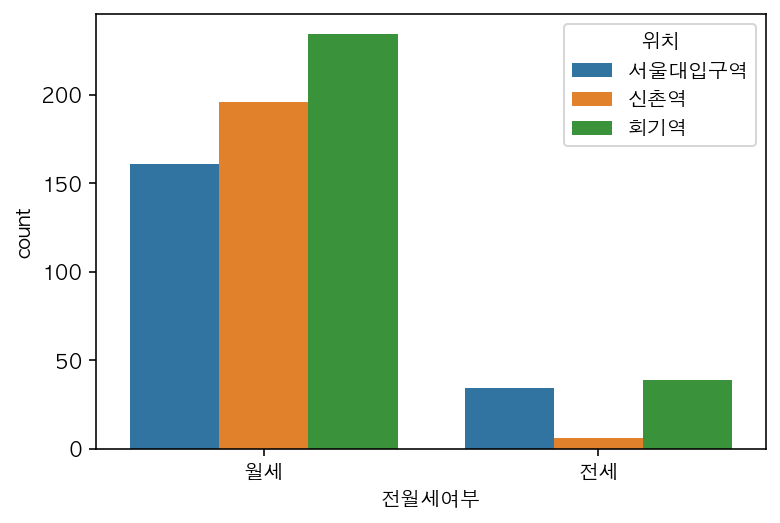

In [149]:
sns.countplot(x="전월세여부",data=df,hue = '위치')
plt.show()

* 월세가 압도적으로 많이 모였습니다. (전세 매물 plz..)

<AxesSubplot:xlabel='위치', ylabel='가격지수'>

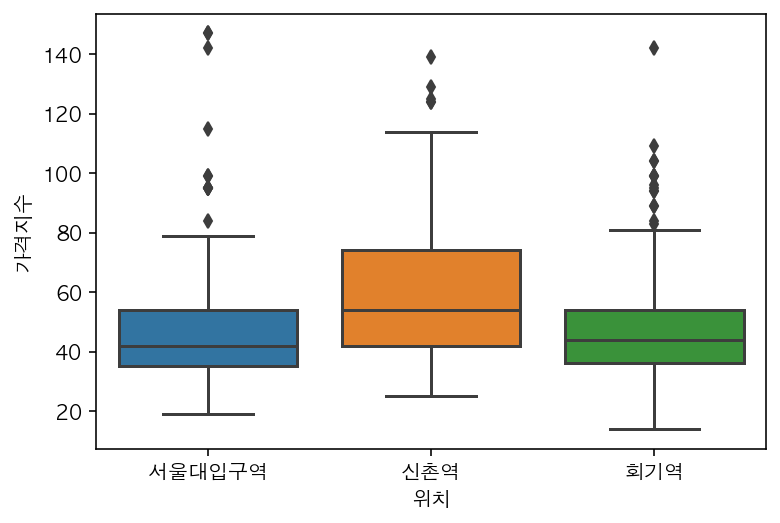

In [148]:
sns.boxplot(x="위치",y="가격지수",data=df)

* 평균은 신촌역 부근이 제일 높게 나왔고, outlier는 서울대입구역이 제일 많이 분포해있었습니다.

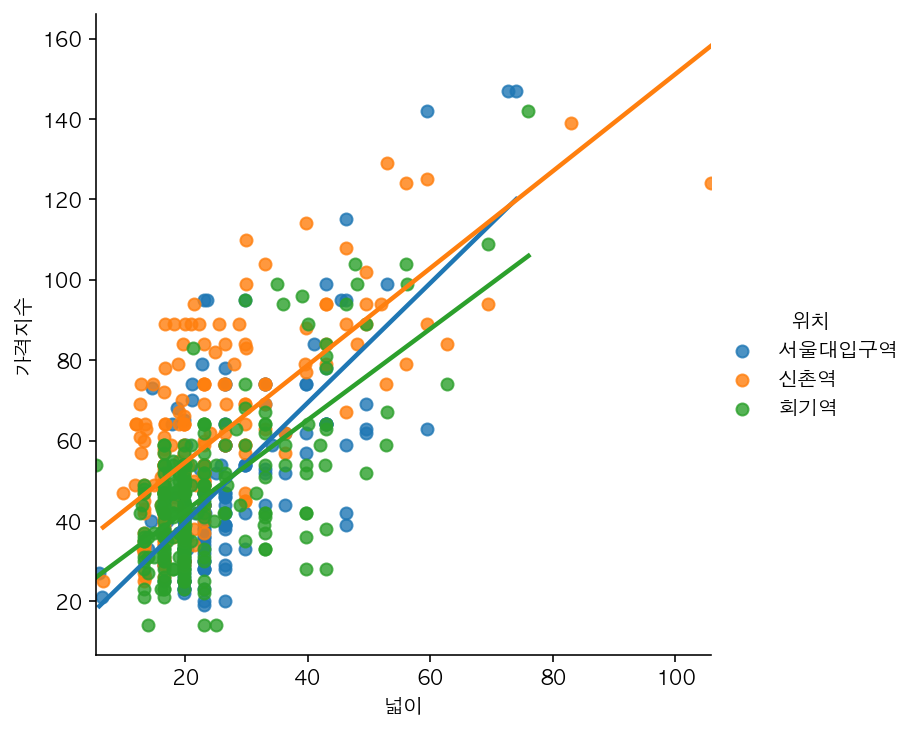

In [143]:
sns.lmplot(x='넓이',y='가격지수',hue='위치',data=df,
          ci=False,order = 1,robust=False)

* 강하지는 않지만 넓이와 가격지수는 양의 상관관계가 보였습니다.
* 서울대입구역의 가격이 제일 넓이에 민감하게 반응합니다.

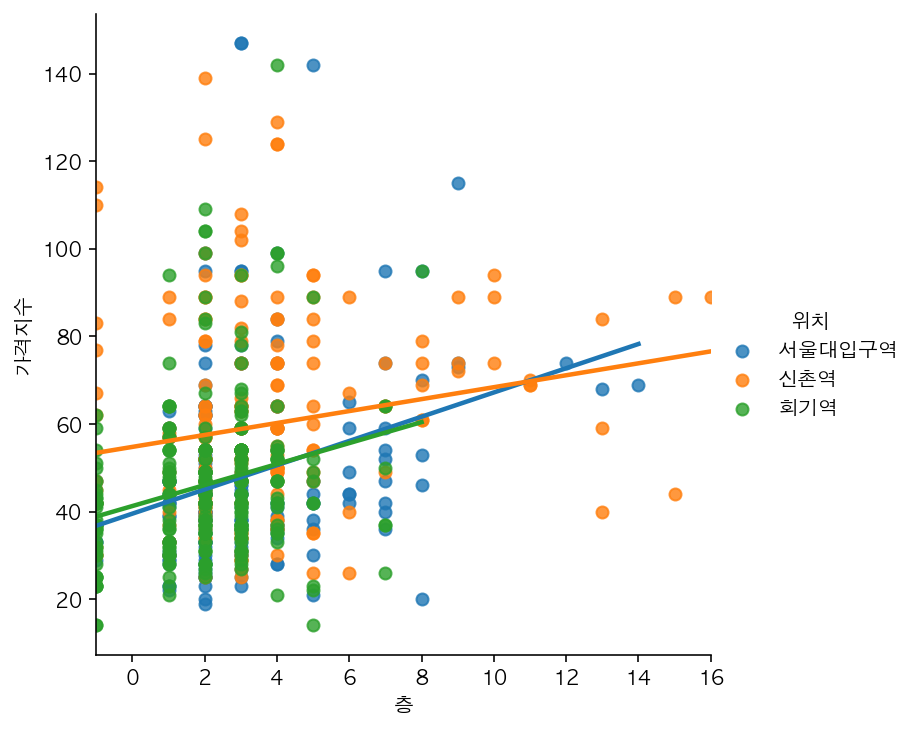

In [144]:
sns.lmplot(x='층',y='가격지수',hue='위치',data=df,
          ci=False,order = 1,robust=False)

* 층수보다는 넓이에 더 강한 양의 상관관계를 보였습니다.

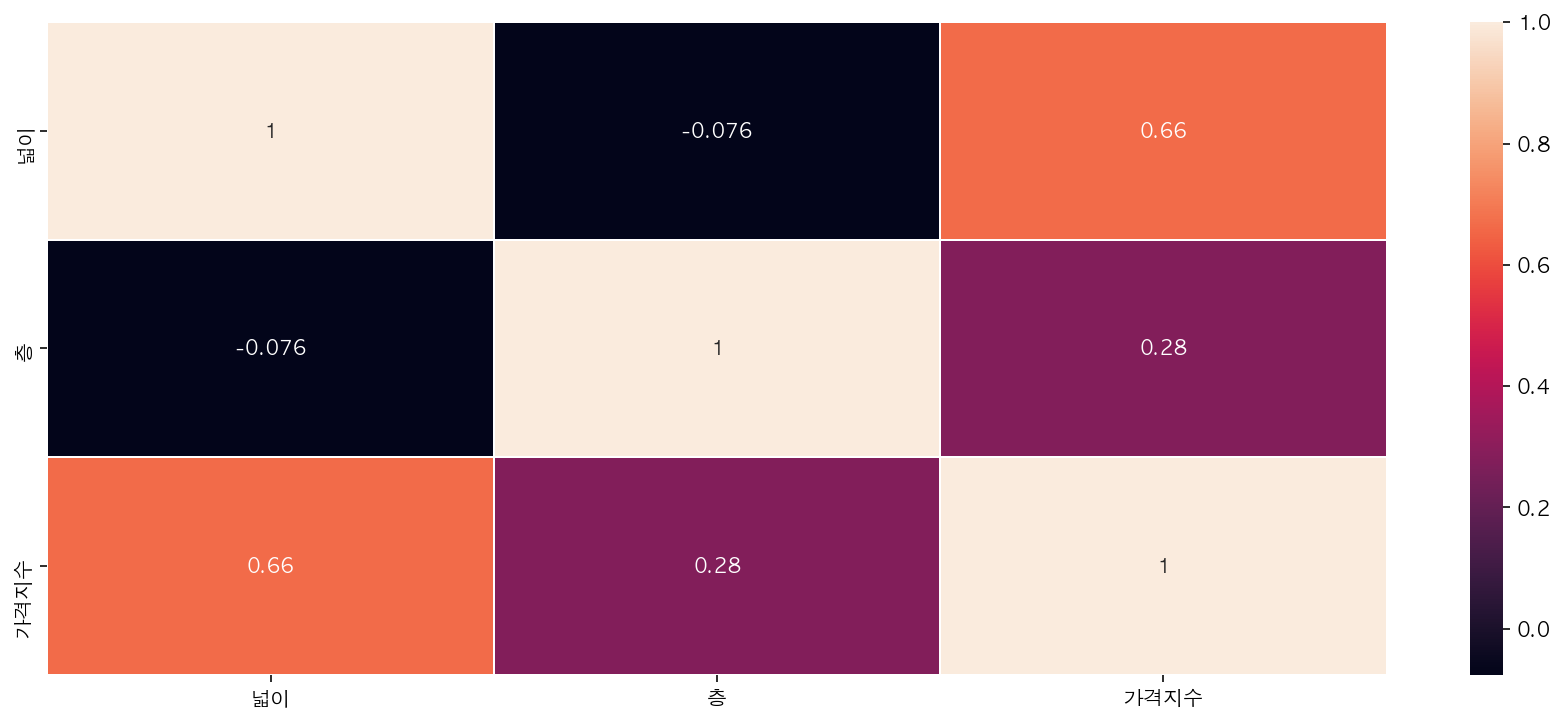

In [147]:
cor = df[['넓이','층','가격지수']].corr()

plt.figure(figsize = (15,6))
sns.heatmap(cor,annot=True,cbar=True,linewidth=0.5)
plt.show()